**Q 1. Make sure that you are using the data that you created for Assignment 3 or 4. This table must have 7
columns.**


• Sort the table according to the increasing order of thermal conductivity. Now divide the complete
data into 7 subgroups of thermal conductivity. Suppress the groups 2, 4 and 6. Now you have only 4
groups of elements based on certain range of thermal conductivity. Now shuffle this data table based
on the thermal conductivity. Apply k-Means method and show that there are 4 groups of elements.

• Repeat the above exercise for electronegativity.

• Do you know a better method than k-Means ? You can solve the problem 1 using your method to
show that it better and get 5 bonus marks.

**Q 2. Apply k-Means method on this data and reveal how many groups it has. Dataset - Micrographs of Metals
Your Jupyter Notebook must show various decorated plots as appropriate for clearly understanding the
problem setup, methodology and model outcome. Definitely show the elbow plot for k-Means method.**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('assignment3.txt')
df.head()

,Elements,Atomic Number,Electronegativity,Atomic Radius,Thermal Conductivity,Density,Crystal System
0,H,1,2.20,0.25,0.1805,0.09,HEX
1,He,2,0.00,1.20,0.1513,0.18,HCP
2,Li,3,0.98,1.45,85.0000,530.00,BCC
3,Be,4,1.57,1.05,190.0000,1850.00,HCP
4,B,5,2.04,0.85,27.0000,2340.00,RHO


In [3]:
df1 = df.sort_values(by = ['Thermal Conductivity'])
df1 = df1.dropna()
df1.shape

(95, 7)

In [4]:
x = df1.iloc[:,[1,4]]
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

In [5]:
from sklearn.cluster import KMeans
k_mean = KMeans(n_clusters = 7,random_state =1)
k_mean.fit(x)

KMeans(n_clusters=7, random_state=1)

In [6]:
centroids = k_mean.cluster_centers_
labels= k_mean.labels_

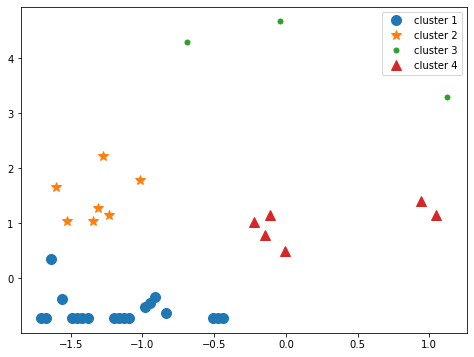

In [7]:
plt.subplots(figsize=(8,6))
plt.plot(x[labels==0,0],x[labels==0,1],'o',markersize= 10, label='cluster 1')
plt.plot(x[labels==2,0],x[labels==2,1],'*',markersize= 10, label='cluster 2')
plt.plot(x[labels==4,0],x[labels==4,1],'.',markersize= 10, label='cluster 3')
plt.plot(x[labels==6,0],x[labels==6,1],'^',markersize= 10, label='cluster 4')

plt.legend(loc='best')
plt.show()

In [8]:
y = df1.iloc[:,[1,2]]
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
y = ss.fit_transform(y)

In [9]:
from sklearn.cluster import KMeans
k_mean = KMeans(n_clusters = 7,random_state =1)
k_mean.fit(y)

KMeans(n_clusters=7, random_state=1)

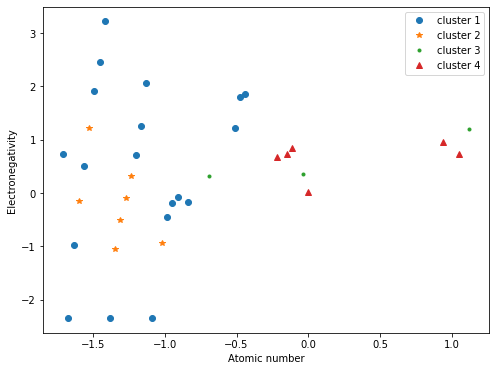

In [10]:
#including only the 1,3,5 and 7th cluster we
plt.subplots(figsize=(8,6))
plt.plot(y[labels==0,0],y[labels==0,1],'o', label='cluster 1')
plt.plot(y[labels==2,0],y[labels==2,1],'*', label='cluster 2')
plt.plot(y[labels==4,0],y[labels==4,1],'.', label='cluster 3')
plt.plot(y[labels==6,0],y[labels==6,1],'^', label='cluster 4')

plt.xlabel('Atomic number')
plt.ylabel('Electronegativity')

plt.legend(loc='best')
plt.show()

In [30]:
import cv2
import os
from skimage import io

images = []
for filename in os.listdir('Micrographs'):
    img = io.imread(os.path.join('Micrographs',filename),as_gray = True)
    if img is not None:
        images.append(img)
images

C:\Users\prakh\anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:2135: UserWarning: tags are not ordered by code
  warnings.warn("tags are not ordered by code")


[array([[133, 110,  80, ...,  64,  67,  64],
        [115, 109,  87, ...,  69,  70,  73],
        [128, 117,  91, ...,  67,  66,  65],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
 array([[ 0,  0,  0, ..., 37,  7,  4],
        [ 0,  0,  0, ...,  4,  6,  1],
        [ 0,  0,  0, ...,  5,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8),
 array([[193, 132, 109, ..., 122, 114, 136],
        [188, 109, 122, ..., 108,  88, 124],
        [190,  90, 150, ..., 109, 141, 156],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
 array([[105, 106, 116, ..., 107,  99, 105],
        [ 98, 105, 109, ...,  96, 110, 107],
        [ 95,  99, 106, ..., 239, 130, 105],
       

In [94]:
image = []
from sklearn.decomposition import PCA
pca = PCA(n_components= 3)
for i in range(0,len(images)):
    np_imag = np.array(images[i])
    
    pca.fit(np_imag)
    img_transform = pca.transform(np_imag)
    image.append(img_transform.reshape(-1))
    

In [95]:
image[0].shape
#flatten the image 

(1566,)

In [96]:
data = pd.DataFrame(image)
data

,0,1,2,3,4,5,6,7,8,9,...,1556,1557,1558,1559,1560,1561,1562,1563,1564,1565
0,862.962587,523.167187,-260.584346,858.438701,523.260300,-277.466069,855.136133,549.282369,-309.732371,830.855742,...,165.174350,2765.313932,-230.787800,165.989201,2756.371031,-237.002455,176.919075,2775.114086,-229.811919,154.429657
1,582.104653,-8.379668,-34.115271,612.018766,-91.764397,-50.149594,661.068516,-215.735692,-278.386365,629.898802,...,70.112121,1524.339953,-187.109352,70.112121,1524.339953,-187.109352,70.112121,1524.339953,-187.109352,70.112121
2,-750.435519,548.738921,-47.325538,-784.509342,494.523756,-90.953105,-757.665111,444.357595,-23.993835,-819.674153,...,70.695313,3788.875418,288.154183,71.045934,3779.530236,296.706805,58.788103,3799.432914,274.628831,85.018062
3,-374.217658,-127.199918,-56.548103,-319.210763,-1.680032,-104.541309,-229.808433,-59.881480,-143.167096,-220.202087,...,-345.559340,2679.951820,298.320654,-345.559340,2679.951820,298.320654,-345.559340,2679.951820,298.320654,-345.559340
4,16.771754,284.004151,-346.997562,5.613985,222.708161,-316.604579,138.734731,318.065042,-372.217692,125.087313,...,-396.955302,2693.841564,64.638801,-396.955302,2693.841564,64.638801,-396.955302,2693.841564,64.638801,-396.955302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,-685.588468,-864.446765,-28.432402,-566.956065,-831.682387,-59.540413,-499.801473,-777.038910,-29.941629,-336.862946,...,81.500705,3262.898477,-297.199614,81.500705,3262.898477,-297.199614,81.500705,3262.898477,-297.199614,81.500705
967,-22.973526,64.362296,390.665012,-69.916795,76.511461,471.603515,-187.791241,-26.188970,518.576403,-245.172844,...,186.738644,3100.945632,-202.831061,186.738644,3100.945632,-202.831061,186.738644,3100.945632,-202.831061,186.738644
968,390.469708,-1.519627,-23.317927,366.297289,-60.463022,-55.134962,285.701782,10.669326,-154.345130,236.614633,...,11.880734,3132.655278,96.201238,11.880734,3132.655278,96.201238,11.880734,3132.655278,96.201238,11.880734
969,-152.245427,-45.567411,-143.860970,-106.774567,-63.916680,-97.042411,-94.532386,-63.560617,-90.810941,-90.875845,...,48.235857,2733.910489,165.123214,48.235857,2733.910489,165.123214,48.235857,2733.910489,165.123214,48.235857


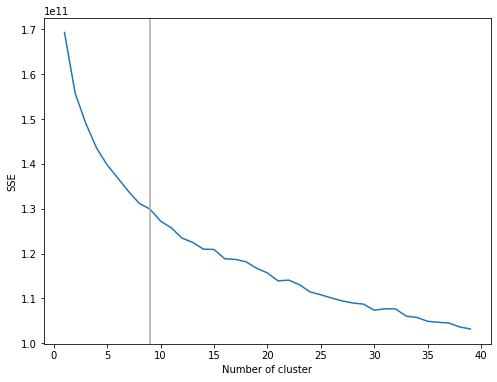

In [98]:
sse = {}
for k in range(1,40):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    
plt.subplots(figsize =(8,6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.axvline(x= 9,color='#A9A9A9')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()